<a href="https://colab.research.google.com/github/chingyaousf/Oral-Squamous-Cell-Carcinoma-CRISPR_gene_Dep-Prediction-by-ML/blob/main/scripts/MLpredictionDep_05_Model_KNN_EIF2AK3_Oral_Squamous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [235]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/filtered_arranged_table_Oral_Squamous.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.238023,0.056584,0.111031,4.206331,0.000000,5.802193,0.042644,4.758623,4.022368,...,2.313246,2.462052,5.465974,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.014355,1.097611,5.661921,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,0.014355,0.150560,3.758090,0.056584,5.972233,0.000000,5.498570,4.773996,...,1.422233,2.330558,6.575766,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,0.070389,0.163499,4.870858,0.000000,5.693766,0.250962,5.144862,3.732269,...,0.028569,1.970854,5.786335,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.000000,2.195348,0.084064,4.704872,3.203201,...,0.584963,1.454176,5.126808,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,0.963474,2.192194,6.153197,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.000000,5.150966,0.176323,5.780573,3.709291,...,0.286881,2.801159,6.649615,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.042644,0.150560,0.713696,0.000000,4.104337,0.475085,5.367022,4.557655,...,0.214125,2.613532,4.647315,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.000000,4.319762,0.356144,5.359310,4.672425,...,0.028569,1.970854,6.375561,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.000000,0.201634,0.739848,0.000000,3.430285,0.000000,5.051372,3.393691,...,0.042644,2.042644,5.304511,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [246]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/EIF2AK3_Oral_Squamous_gt_00.csv")
data

,DepMap_ID,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL2 (344752) Exp,AADACL4 (343066) Exp,AAGAB (79719) Exp,AAK1 (22848) Exp,...,ZW10 (9183) Exp,ZWILCH (55055) Exp,ZXDC (79364) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.206331,0.000000,0.042644,4.022368,0.000000,0.422233,0.000000,3.885574,2.998196,...,3.772941,3.026800,4.343408,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.298658,0.000000,0.028569,3.403268,0.941106,0.000000,0.000000,4.376429,2.025029,...,3.606442,3.925999,2.693766,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,3.758090,0.056584,0.000000,4.773996,0.790772,0.014355,0.000000,5.466627,3.054848,...,3.160275,3.708187,4.077243,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,4.870858,0.000000,0.250962,3.732269,0.056584,0.000000,0.000000,4.734439,2.321928,...,3.340562,4.107688,3.917432,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.650765,0.000000,0.084064,3.203201,1.333424,0.000000,0.000000,4.248687,2.671293,...,3.733354,2.843984,3.240314,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,4.440952,0.000000,0.000000,4.581954,0.028569,0.000000,0.000000,4.638074,3.010780,...,3.215679,3.443607,2.769772,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.250962,0.000000,0.176323,3.709291,0.641546,0.000000,0.000000,5.018367,3.019702,...,3.232661,3.724650,4.693766,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.713696,0.000000,0.475085,4.557655,0.111031,0.042644,0.000000,5.096346,2.773996,...,3.368768,3.490570,4.056584,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.797013,0.000000,0.356144,4.672425,3.228049,0.000000,0.000000,5.066950,3.605257,...,3.349082,3.536053,4.311067,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.739848,0.000000,0.000000,3.393691,0.137504,0.000000,0.000000,6.102658,2.733354,...,2.906891,4.924575,3.537296,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [203]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/EIF2AK3_Oral_Squamous_gt_01.csv")
data

,DepMap_ID,ABCA12 (26154) Exp,ATG3 (64422) Exp,BCL2A1 (597) Exp,EGR3 (1960) Exp,FYB1 (2533) Exp,GFM1 (85476) Exp,HCLS1 (3059) Exp,KRR1 (11103) Exp,LAMB4 (22798) Exp,...,RPS19BP1 (91582) Exp,RPS6KA5 (9252) Exp,TBRG4 (9238) Exp,TMEM229B (161145) Exp,UTP4 (84916) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.316870,4.746850,0.333424,0.895303,3.061776,4.560104,0.400538,5.502712,0.163499,...,5.633141,1.028569,6.449561,1.014355,4.895787,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.097611,5.053980,0.475085,0.871844,2.153805,4.647315,4.489286,5.901832,0.070389,...,5.563158,1.124328,5.394034,2.456806,5.232277,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,3.404631,5.759156,0.799087,0.773996,2.319040,5.582255,1.056584,5.243364,0.163499,...,6.366322,2.560715,6.036503,1.664483,5.879706,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,1.589763,5.548128,0.214125,0.356144,4.626439,4.815063,1.117695,5.646163,0.555816,...,6.567424,1.594549,6.566815,1.176323,5.674969,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.941106,5.021480,0.042644,0.722466,4.086614,4.634012,4.534809,4.475085,0.028569,...,5.765004,1.516015,5.267161,0.659925,4.620586,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,1.803227,5.370513,0.321928,0.201634,1.035624,3.240314,0.201634,4.585563,0.111031,...,5.890447,2.269033,6.114367,0.070389,5.715344,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,1.778209,5.567424,1.182692,0.464668,4.240314,4.860466,0.650765,4.514753,0.356144,...,5.880930,2.555816,7.643279,2.408712,4.954662,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.863938,5.023699,0.056584,0.321928,0.687061,5.111031,0.286881,4.997292,0.124328,...,5.507478,2.438293,5.937815,1.687061,4.920770,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,0.941106,5.015248,3.555816,1.070389,7.886001,4.175525,6.715893,4.919817,0.321928,...,5.576824,2.742006,6.483010,2.422233,5.145677,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,1.310340,6.118526,0.978196,1.104337,3.169925,5.091700,0.176323,5.442612,0.097611,...,6.382667,3.003602,6.821328,3.665620,6.045268,0.008650,0.986207,0.018890,0.975153,0.038666


In [218]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/EIF2AK3_Oral_Squamous_ng_01.csv")
data

,DepMap_ID,ANGPTL2 (23452) Exp,DDAH2 (23564) Exp,DES (1674) Exp,FCGRT (2217) Exp,GREM1 (26585) Exp,INSRR (3645) Exp,LGR5 (8549) Exp,LOXL1 (4016) Exp,NID2 (22795) Exp,...,TAS2R8 (50836) Exp,TMEM35A (59353) Exp,ZC4H2 (55906) Exp,ZNF578 (147660) Exp,ZNF835 (90485) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,0.739848,4.837439,0.176323,2.596935,0.201634,0.000000,0.028569,4.234195,0.765535,...,0.000000,0.000000,0.097611,0.070389,0.000000,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.400538,2.819668,0.028569,4.361066,1.632268,0.042644,0.000000,4.910253,2.289834,...,0.000000,0.000000,0.042644,0.000000,0.000000,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,2.424922,4.667324,0.321928,5.016585,0.344828,0.000000,0.070389,5.454834,4.072106,...,0.000000,0.000000,0.097611,0.000000,0.000000,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,2.754888,3.558268,0.226509,3.969933,0.344828,0.014355,0.137504,4.118526,0.799087,...,0.097611,0.443607,1.490570,0.014355,0.000000,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.084064,1.992768,0.000000,1.871844,0.815575,0.000000,0.028569,0.731183,0.286881,...,0.000000,0.000000,0.056584,0.000000,0.000000,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,0.056584,4.011675,0.084064,0.622930,2.634593,0.000000,0.042644,1.427606,0.310340,...,0.028569,0.028569,0.464668,0.014355,0.000000,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.070389,3.771886,0.000000,3.481557,0.056584,0.014355,0.056584,1.541019,0.150560,...,0.000000,0.000000,0.111031,0.000000,0.000000,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.250962,3.752749,0.000000,5.337354,3.414136,0.014355,0.014355,2.493135,1.035624,...,0.000000,0.014355,0.641546,0.014355,0.000000,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,0.042644,4.845992,0.056584,4.560104,0.124328,0.028569,0.028569,0.933573,0.432959,...,0.000000,0.042644,1.137504,0.014355,0.014355,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.124328,4.107688,0.056584,2.639232,0.238787,0.014355,0.028569,3.731183,0.298658,...,0.000000,0.124328,0.111031,0.000000,0.000000,0.008650,0.986207,0.018890,0.975153,0.038666


In [247]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AADACL4_343066_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,...,ZW10_9183_Exp,ZWILCH_55055_Exp,ZXDC_79364_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000181,4.206331,0.000000,0.042644,4.022368,0.000000,0.422233,0.000000,3.885574,2.998196,...,3.772941,3.026800,4.343408,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.298658,0.000000,0.028569,3.403268,0.941106,0.000000,0.000000,4.376429,2.025029,...,3.606442,3.925999,2.693766,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,3.758090,0.056584,0.000000,4.773996,0.790772,0.014355,0.000000,5.466627,3.054848,...,3.160275,3.708187,4.077243,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,4.870858,0.000000,0.250962,3.732269,0.056584,0.000000,0.000000,4.734439,2.321928,...,3.340562,4.107688,3.917432,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.650765,0.000000,0.084064,3.203201,1.333424,0.000000,0.000000,4.248687,2.671293,...,3.733354,2.843984,3.240314,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,4.440952,0.000000,0.000000,4.581954,0.028569,0.000000,0.000000,4.638074,3.010780,...,3.215679,3.443607,2.769772,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.250962,0.000000,0.176323,3.709291,0.641546,0.000000,0.000000,5.018367,3.019702,...,3.232661,3.724650,4.693766,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.713696,0.000000,0.475085,4.557655,0.111031,0.042644,0.000000,5.096346,2.773996,...,3.368768,3.490570,4.056584,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.797013,0.000000,0.356144,4.672425,3.228049,0.000000,0.000000,5.066950,3.605257,...,3.349082,3.536053,4.311067,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.739848,0.000000,0.000000,3.393691,0.137504,0.000000,0.000000,6.102658,2.733354,...,2.906891,4.924575,3.537296,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [248]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["EIF2AK3_9451_Dep"]]

targets

,EIF2AK3_9451_Dep
0,0.074646
1,0.052718
2,0.156112
3,0.010761
4,0.078337
5,0.036254
6,0.049299
7,0.045031
8,0.099956
9,0.008650


In [249]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42)


In [250]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=4)

In [252]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [253]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.05715331]
 [0.09323792]
 [0.06649806]
 [0.22979832]
 [0.07811096]
 [0.07318392]
 [0.0328868 ]
 [0.04008137]
 [0.24767209]
 [0.09543225]
 [0.07827268]
 [0.23764494]
 [0.21163412]
 [0.06252695]
 [0.22809543]
 [0.24767209]
 [0.04008137]]


In [254]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.011188494576359795


In [255]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.08087571808003069


In [256]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): -4.70549231612679


In [187]:
# EIF2AK3_filtered_arranged_table_Oral_Squamous.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.017790779903846584
Mean Absolute Error: 0.11101373048885253
Coefficient of Determination (R-squared): -8.072280220233576


In [257]:
# EIF2AK3_Oral_Squamous_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.011188494576359795
Mean Absolute Error: 0.08087571808003069
Coefficient of Determination (R-squared): -4.70549231612679


In [216]:
# EIF2AK3_Oral_Squamous_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.010854684198020383
Mean Absolute Error: 0.0780498940807781
Coefficient of Determination (R-squared): -4.535268115215702


In [229]:
# EIF2AK3_Oral_Squamous_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.018316669078428126
Mean Absolute Error: 0.11082939387613963
Coefficient of Determination (R-squared): -8.34045362142098


In [188]:
# EIF2AK3_filtered_arranged_table_Oral_Squamous.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_filtered_arranged_table_Oral_Squamous.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
24,ACH-001347,2.467279,0.000000,0.042644,5.655352,0.0,5.690976,0.000000,4.590362,4.090007,...,0.815575,2.134221,3.754888,0.042644,2.367371,7.249161,2.963474,3.806324,0.218819,0.023893
13,ACH-000735,0.189034,0.014355,0.150560,0.189034,0.0,3.738768,0.042644,5.073820,4.909773,...,0.310340,0.963474,4.180307,0.056584,2.353323,5.420213,3.140779,3.270529,0.093238,0.048555
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.0,4.319762,0.356144,5.359310,4.672425,...,1.232661,2.150560,4.311067,0.028569,1.970854,6.375561,3.693766,3.690417,0.066498,0.099956
25,ACH-001509,0.124328,0.028569,0.000000,3.107688,0.0,5.355087,0.000000,4.093391,3.942045,...,0.757023,1.613532,3.910733,0.028569,1.356144,5.250583,2.207893,3.849999,0.240016,0.052870
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.0,2.195348,0.084064,4.704872,3.203201,...,0.545968,1.201634,3.240314,0.584963,1.454176,5.126808,3.407353,3.764474,0.239348,0.078337
40,ACH-002045,0.275007,0.000000,0.000000,0.871844,0.0,3.819668,0.000000,4.286142,4.575312,...,0.669027,1.432959,2.582556,0.000000,2.518535,5.084064,2.319040,3.357552,0.229205,0.030359
19,ACH-000836,0.669027,0.000000,0.310340,0.275007,0.0,1.195348,0.042644,5.192983,4.230357,...,1.137504,1.922198,3.865919,1.682573,2.627607,5.562242,3.158660,4.238787,0.057717,0.076620
39,ACH-002029,0.000000,0.000000,1.189034,0.000000,0.0,2.367371,0.000000,5.485105,4.238023,...,0.695994,1.356144,2.877744,0.000000,2.575312,5.732269,2.553361,4.410070,0.194870,0.105691
29,ACH-001543,2.333424,0.000000,0.000000,2.935460,0.0,4.038261,0.084064,5.200850,3.147307,...,1.117695,1.769772,2.935460,0.070389,1.416840,6.215679,2.358959,4.401221,0.247672,0.008448
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.0,5.150966,0.176323,5.780573,3.709291,...,1.316146,2.176323,4.693766,0.286881,2.801159,6.649615,4.120186,3.599318,0.095432,0.049299


In [202]:
# EIF2AK3_Oral_Squamous_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AADACL4_343066_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,...,ZSWIM1_90204_Exp,ZSWIM7_125150_Exp,ZUP1_221302_Exp,ZW10_9183_Exp,ZWILCH_55055_Exp,ZXDC_79364_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
24,ACH-001347,5.655352,0.0,0.000000,4.090007,0.042644,0.275007,0.0,4.978196,3.182692,...,3.030336,4.604664,3.548437,4.093391,2.746313,3.754888,2.963474,3.806324,0.057153,0.023893
13,ACH-000735,0.189034,0.0,0.042644,4.909773,1.659925,0.000000,0.0,5.019702,3.379898,...,3.223423,4.426936,3.238787,4.379205,3.812498,4.180307,3.140779,3.270529,0.093238,0.048555
8,ACH-000548,2.797013,0.0,0.356144,4.672425,3.228049,0.000000,0.0,5.066950,3.605257,...,3.715893,3.745237,3.705978,3.349082,3.536053,4.311067,3.693766,3.690417,0.066498,0.099956
25,ACH-001509,3.107688,0.0,0.000000,3.942045,0.310340,0.014355,0.0,4.559492,1.855990,...,2.720278,3.845992,4.301588,2.759156,3.032101,3.910733,2.207893,3.849999,0.229798,0.052870
4,ACH-000472,0.650765,0.0,0.084064,3.203201,1.333424,0.000000,0.0,4.248687,2.671293,...,2.493135,3.604071,2.970854,3.733354,2.843984,3.240314,3.407353,3.764474,0.078111,0.078337
40,ACH-002045,0.871844,0.0,0.000000,4.575312,0.963474,0.056584,0.0,5.064797,2.827819,...,2.333424,4.214125,4.185867,3.843984,4.648465,2.582556,2.319040,3.357552,0.073184,0.030359
19,ACH-000836,0.275007,0.0,0.042644,4.230357,2.134221,0.000000,0.0,4.976822,1.948601,...,2.869871,3.882643,3.605257,4.792335,5.113950,3.865919,3.158660,4.238787,0.032887,0.076620
39,ACH-002029,0.000000,0.0,0.000000,4.238023,2.989139,0.000000,0.0,4.848998,2.803227,...,2.516015,4.150560,4.090853,3.705978,4.604071,2.877744,2.553361,4.410070,0.040081,0.105691
29,ACH-001543,2.935460,0.0,0.084064,3.147307,0.014355,0.000000,0.0,3.837943,2.680324,...,2.582556,3.860963,2.356144,2.867896,2.835924,2.935460,2.358959,4.401221,0.247672,0.008448
6,ACH-000518,0.250962,0.0,0.176323,3.709291,0.641546,0.000000,0.0,5.018367,3.019702,...,3.896272,3.580145,3.936402,3.232661,3.724650,4.693766,4.120186,3.599318,0.095432,0.049299


In [217]:
# EIF2AK3_Oral_Squamous_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCA12_26154_Exp,ATG3_64422_Exp,BCL2A1_597_Exp,EGR3_1960_Exp,FYB1_2533_Exp,GFM1_85476_Exp,HCLS1_3059_Exp,KRR1_11103_Exp,LAMB4_22798_Exp,...,QTRT2_79691_Exp,RIOX2_84864_Exp,RNF19B_127544_Exp,RPS19BP1_91582_Exp,RPS6KA5_9252_Exp,TBRG4_9238_Exp,TMEM229B_161145_Exp,UTP4_84916_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
24,ACH-001347,3.811471,5.490249,0.056584,0.238787,5.874059,4.791814,0.713696,4.742545,0.070389,...,3.196922,4.247928,4.611172,5.873075,1.292782,5.951401,0.790772,4.896272,0.071916,0.023893
13,ACH-000735,0.687061,5.926711,3.179511,0.545968,4.467932,4.796494,4.420213,5.000000,0.226509,...,4.105175,4.889960,4.075533,5.548128,1.469886,5.417177,2.097611,5.707911,0.086865,0.048555
8,ACH-000548,0.941106,5.015248,3.555816,1.070389,7.886001,4.175525,6.715893,4.919817,0.321928,...,3.961623,4.749534,5.965092,5.576824,2.742006,6.483010,2.422233,5.145677,0.096972,0.099956
25,ACH-001509,2.266037,4.313246,0.389567,0.443607,3.777157,4.381283,0.731183,3.863938,0.042644,...,3.019702,4.227279,3.358959,5.339137,0.773996,5.397118,0.389567,3.999098,0.238146,0.052870
4,ACH-000472,0.941106,5.021480,0.042644,0.722466,4.086614,4.634012,4.534809,4.475085,0.028569,...,3.593354,4.298658,3.632268,5.765004,1.516015,5.267161,0.659925,4.620586,0.112413,0.078337
40,ACH-002045,2.298658,5.347311,0.070389,0.014355,1.914565,5.629648,0.286881,5.538849,0.042644,...,3.624101,4.013462,3.564378,5.588265,2.485427,6.272023,0.014355,5.594549,0.045893,0.030359
19,ACH-000836,0.321928,6.123914,2.405992,0.056584,2.726831,6.091700,6.757157,5.861459,0.000000,...,4.684258,4.669594,3.471187,6.672142,2.375735,5.857981,1.021480,5.982309,0.019906,0.076620
39,ACH-002029,0.632268,6.247168,0.000000,1.021480,0.250962,5.850249,0.687061,5.274262,0.956057,...,4.340562,4.954662,3.697107,5.412443,1.963474,6.055716,0.163499,6.093180,0.098985,0.105691
29,ACH-001543,0.622930,5.223809,0.000000,0.150560,4.666757,4.779260,0.111031,4.136684,0.056584,...,3.283922,3.879706,4.741467,5.897966,1.182692,5.465322,0.137504,5.095503,0.096653,0.008448
6,ACH-000518,1.778209,5.567424,1.182692,0.464668,4.240314,4.860466,0.650765,4.514753,0.356144,...,4.366672,5.635754,5.108524,5.880930,2.555816,7.643279,2.408712,4.954662,0.086865,0.049299


In [230]:
# EIF2AK3_Oral_Squamous_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ANGPTL2_23452_Exp,DDAH2_23564_Exp,DES_1674_Exp,FCGRT_2217_Exp,GREM1_26585_Exp,INSRR_3645_Exp,LGR5_8549_Exp,LOXL1_4016_Exp,NID2_22795_Exp,RNF122_79845_Exp,SOX11_6664_Exp,SPAG6_9576_Exp,TAS2R8_50836_Exp,TMEM35A_59353_Exp,ZC4H2_55906_Exp,ZNF578_147660_Exp,ZNF835_90485_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
24,ACH-001347,0.000000,3.895303,0.000000,4.744161,0.028569,0.000000,0.014355,1.531069,0.356144,0.704872,0.000000,0.014355,0.0,0.000000,0.124328,0.000000,0.000000,0.069245,0.023893
13,ACH-000735,0.124328,4.474436,0.250962,3.769772,0.201634,0.014355,0.028569,2.678072,0.137504,0.790772,0.014355,0.000000,0.0,0.028569,0.084064,0.000000,0.000000,0.060921,0.048555
8,ACH-000548,0.042644,4.845992,0.056584,4.560104,0.124328,0.028569,0.028569,0.933573,0.432959,1.687061,0.042644,0.014355,0.0,0.042644,1.137504,0.014355,0.014355,0.098565,0.099956
25,ACH-001509,0.124328,4.244126,0.000000,2.731183,0.014355,0.000000,0.014355,0.879706,0.201634,0.400538,0.000000,0.014355,0.0,0.000000,0.000000,0.000000,0.000000,0.220455,0.052870
4,ACH-000472,0.084064,1.992768,0.000000,1.871844,0.815575,0.000000,0.028569,0.731183,0.286881,0.704872,0.000000,0.000000,0.0,0.000000,0.056584,0.000000,0.000000,0.231054,0.078337
40,ACH-002045,0.000000,3.598127,0.000000,0.000000,0.000000,0.000000,0.014355,0.056584,0.042644,1.490570,0.000000,0.000000,0.0,0.000000,1.077243,0.000000,0.000000,0.252758,0.030359
19,ACH-000836,0.097611,2.523562,0.042644,2.550901,2.307429,0.000000,0.097611,1.480265,0.150560,0.367371,0.014355,0.000000,0.0,0.000000,0.070389,0.000000,0.000000,0.204566,0.076620
39,ACH-002029,0.485427,2.669027,0.042644,1.718088,0.000000,0.000000,0.000000,1.608809,0.000000,0.505891,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.231054,0.105691
29,ACH-001543,0.028569,3.768714,0.000000,2.060047,0.201634,0.000000,0.014355,0.790772,0.028569,1.400538,0.000000,0.000000,0.0,0.000000,0.310340,0.042644,0.000000,0.101549,0.008448
6,ACH-000518,0.070389,3.771886,0.000000,3.481557,0.056584,0.014355,0.056584,1.541019,0.150560,0.704872,0.014355,0.286881,0.0,0.000000,0.111031,0.000000,0.000000,0.032792,0.049299


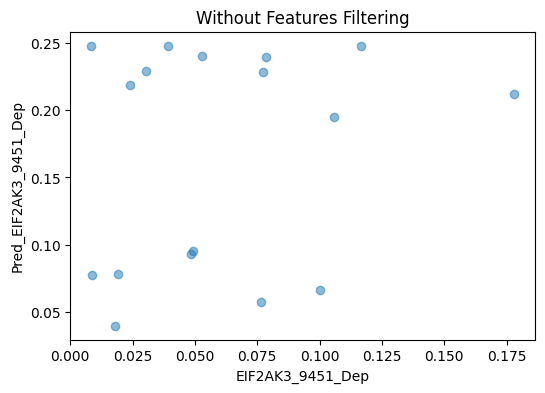

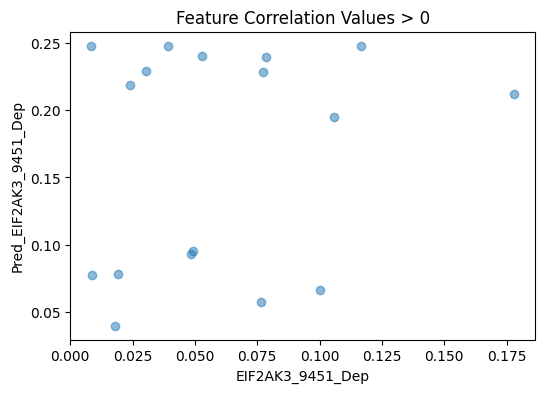

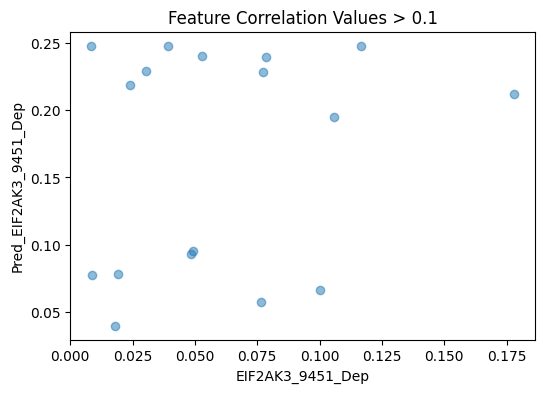

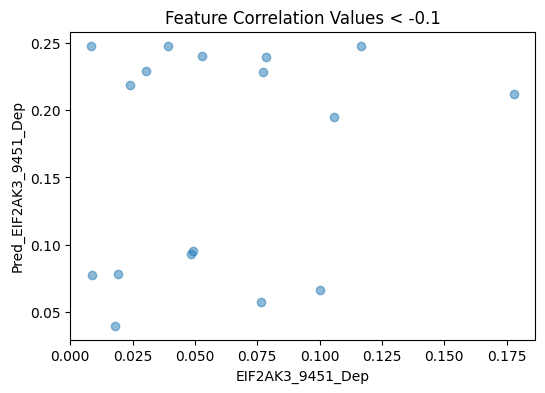

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_filtered_arranged_table_Oral_Squamous.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Extract the required columns
x = dfs[0]['EIF2AK3_9451_Dep']
y = dfs[0]['Pred_EIF2AK3_9451_Dep']

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel('EIF2AK3_9451_Dep')
    plt.ylabel('Pred_EIF2AK3_9451_Dep')
    plt.title(titles[i])
    plt.show()


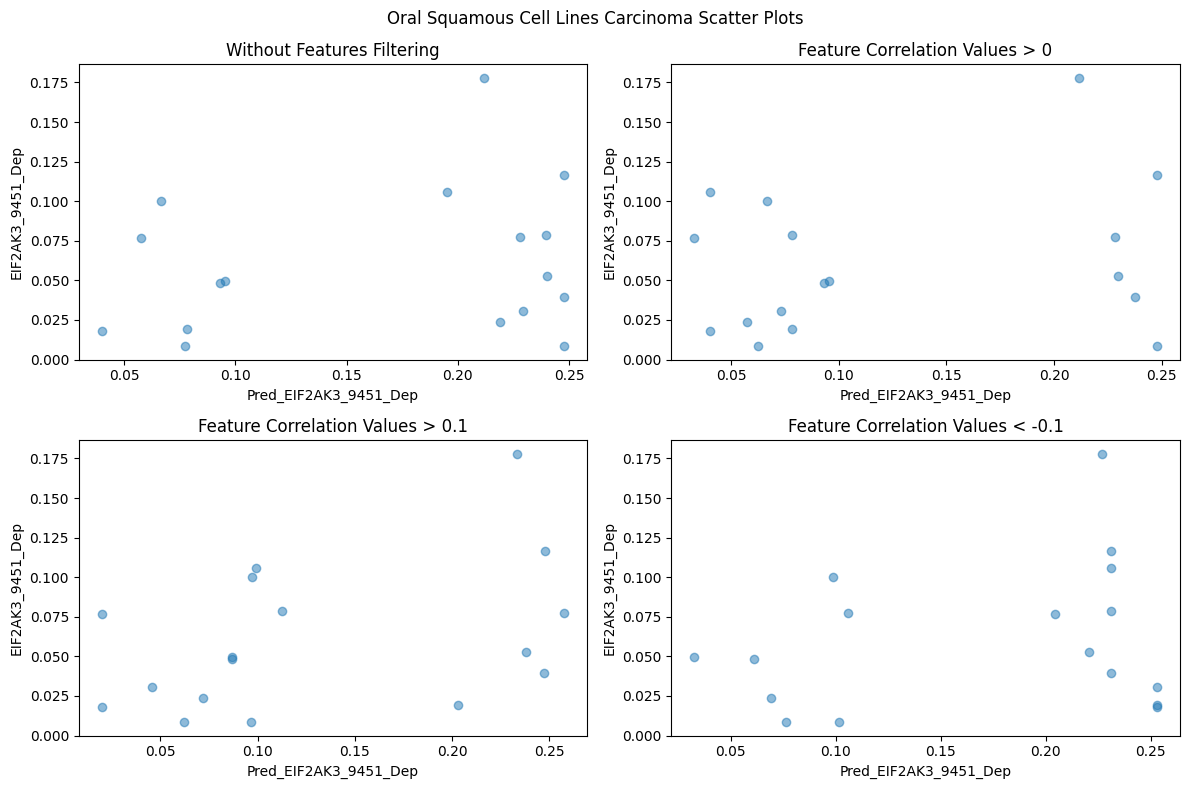

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_filtered_arranged_table_Oral_Squamous.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Extract the required columns
x = dfs[0]['Pred_EIF2AK3_9451_Dep']
y = dfs[0]['EIF2AK3_9451_Dep']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Oral Squamous Cell Lines Carcinoma Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i // 2][i % 2]  # Select the subplot
    ax.scatter(df['Pred_EIF2AK3_9451_Dep'], df['EIF2AK3_9451_Dep'], alpha=0.5)
    ax.set_xlabel('Pred_EIF2AK3_9451_Dep')
    ax.set_ylabel('EIF2AK3_9451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


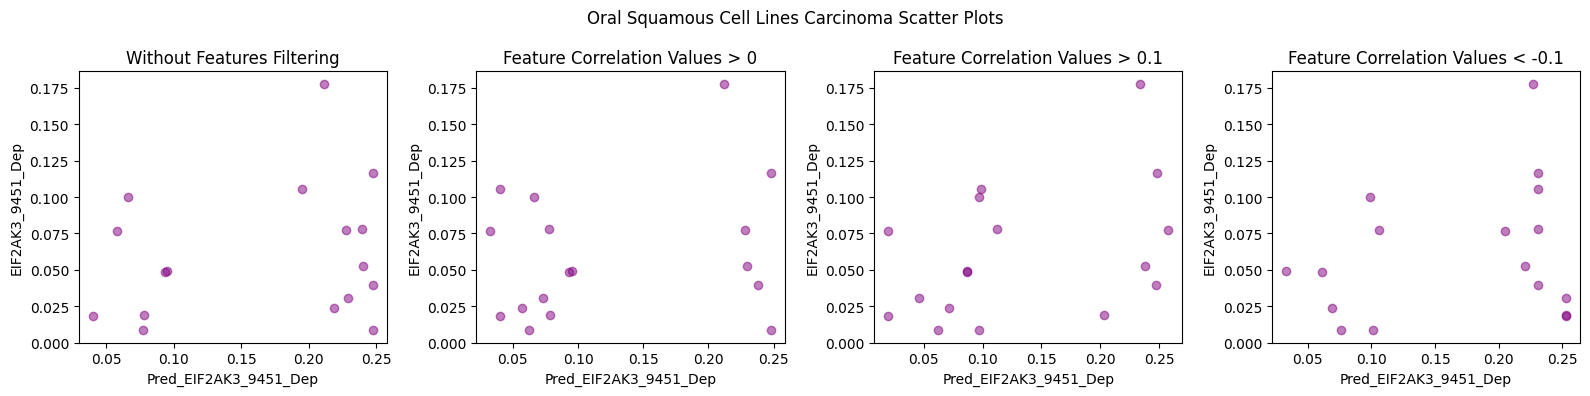

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_filtered_arranged_table_Oral_Squamous.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_EIF2AK3_Oral_Squamous_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Oral Squamous Cell Lines Carcinoma Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_EIF2AK3_9451_Dep'], df['EIF2AK3_9451_Dep'],c='purple',alpha=0.5)
    ax.set_xlabel('Pred_EIF2AK3_9451_Dep')
    ax.set_ylabel('EIF2AK3_9451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
